In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_loader import load_all
from src import eda


In [2]:
df, ref = load_all()
df.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [3]:
summary = eda.summarize_dataset(df)

for k, v in summary.items():
    print(f"\n{k.upper()}")
    print(v)



RECORD_TYPE
record_type
observation    30
event          10
target          3
Name: count, dtype: int64

PILLAR
pillar
ACCESS           16
USAGE            11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

SOURCE_TYPE
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64

CONFIDENCE
confidence
high      40
medium     3
Name: count, dtype: int64


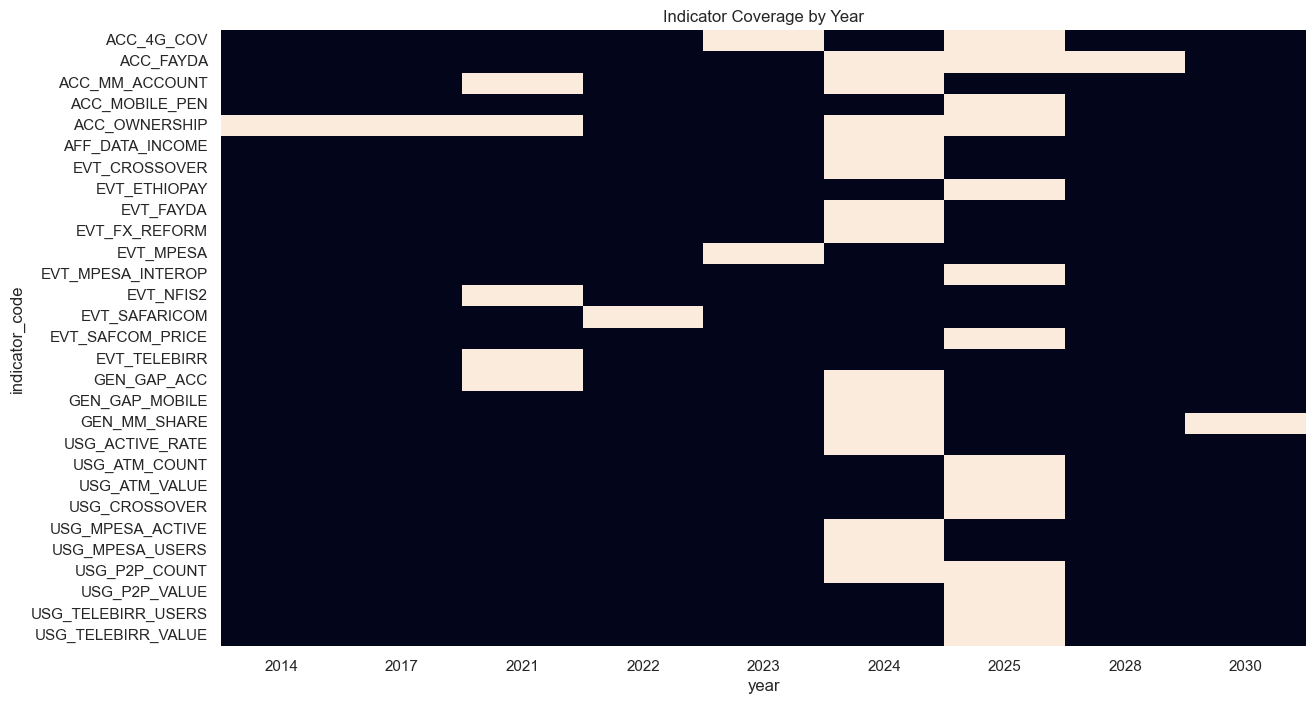

In [4]:
coverage = eda.temporal_coverage(df)
eda.plot_temporal_coverage(coverage)


In [5]:
eda.sparse_indicators(df)


indicator_code
ACC_MOBILE_PEN       1
EVT_ETHIOPAY         1
EVT_CROSSOVER        1
AFF_DATA_INCOME      1
EVT_MPESA_INTEROP    1
EVT_MPESA            1
EVT_FX_REFORM        1
EVT_FAYDA            1
EVT_NFIS2            1
EVT_SAFARICOM        1
dtype: int64

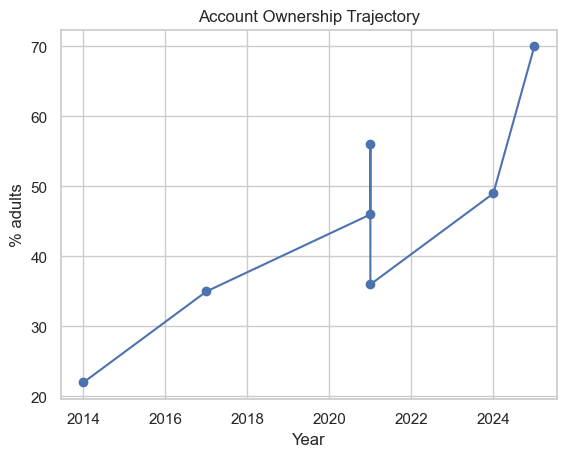

In [6]:
access = eda.account_trajectory(df)
eda.plot_account_trajectory(access)


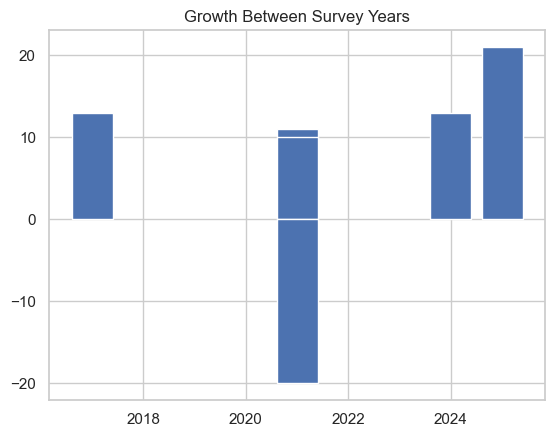

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year,growth_pp
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017,13.0
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021,11.0
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,10.0
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,-20.0
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN,2024,13.0
30,REC_0031,target,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,70.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NFIS-II target,NaN,2025,21.0


In [7]:
access = eda.growth_rates(access)
eda.plot_growth(access)

access


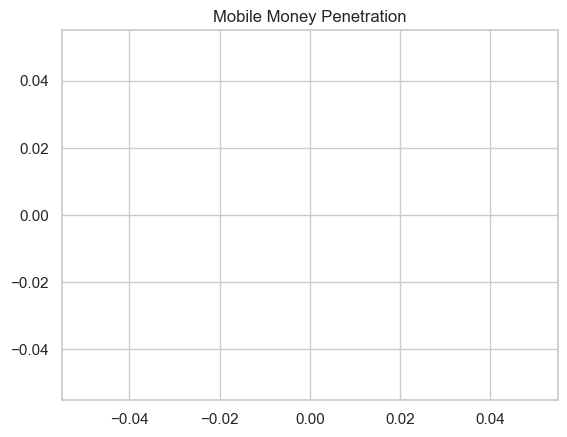

In [8]:
usage = eda.mobile_money_trend(df)
eda.plot_mobile_trend(usage)


In [12]:
infra = eda.infrastructure_subset(df)
infra.groupby("indicator_code").size()


Series([], dtype: int64)

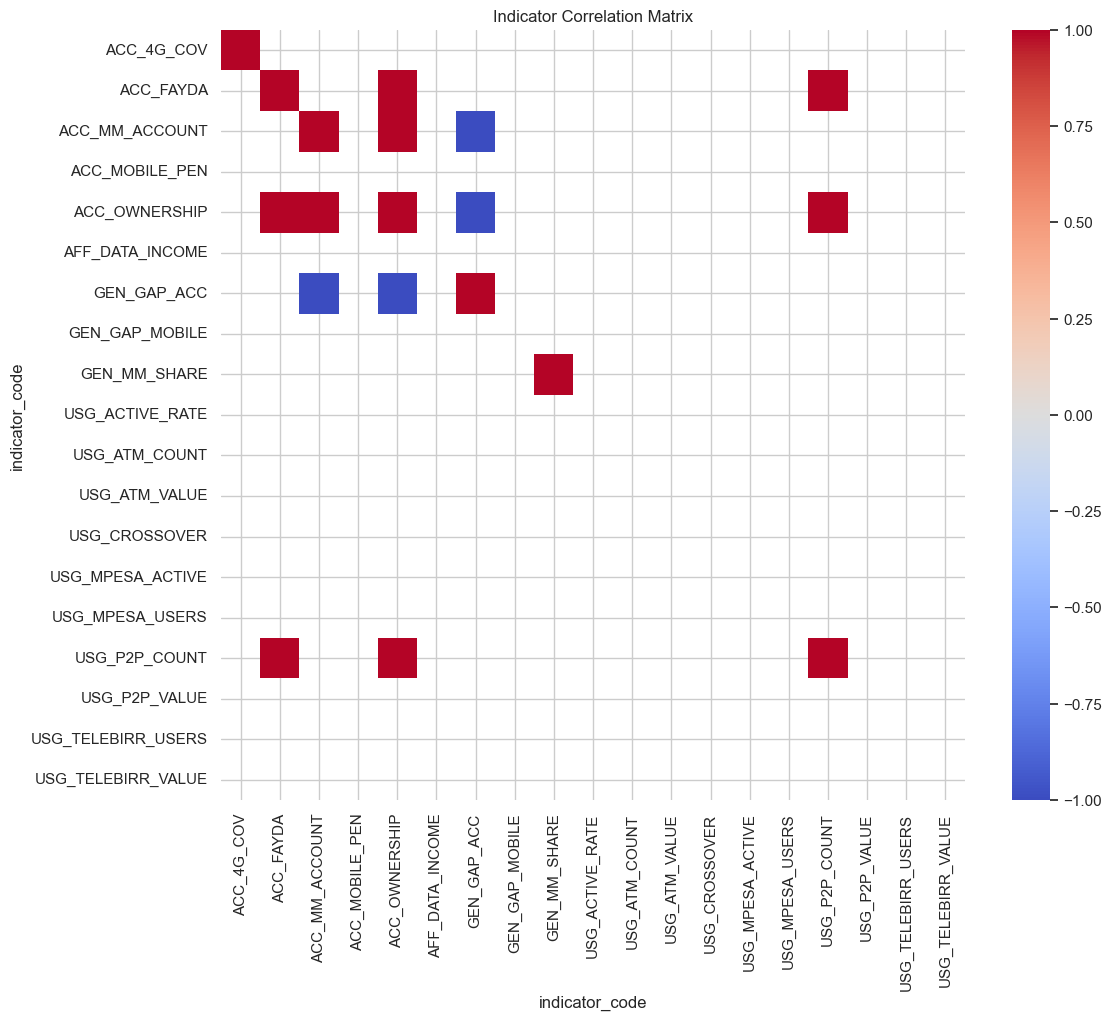

In [10]:
corr = eda.correlation_matrix(df)
eda.plot_correlation(corr)


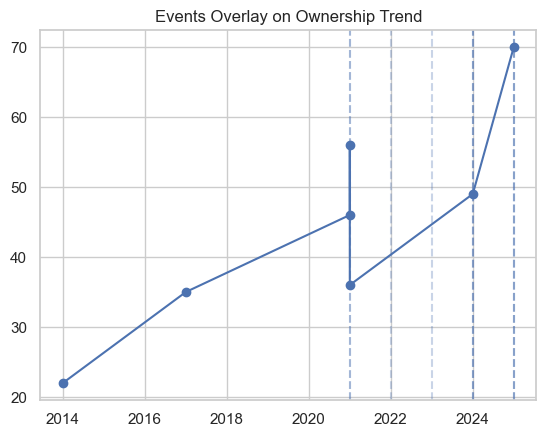

In [11]:
events = eda.extract_events(df)
eda.overlay_events(access, events)
